In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


test = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 Basic 해외 부동산 월세 예측 AI 경진대회/open/test.csv')
train = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 Basic 해외 부동산 월세 예측 AI 경진대회/open/train.csv')

In [2]:
# 한글 폰트 깨짐 현상 방지
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin':
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')

# 데이터 살펴보기

In [3]:
train.head() # latitude = 위도, longitude = 경도, suburb = 지역 이름

# y값은 monthlyRent(us_dollar)로 하기

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
0,Train_0000,Apartment,3,28.638710,77.295822,Delhi East,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Train_0001,Independent Floor,1,28.498940,77.207191,Delhi South,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Train_0002,Independent Floor,3,28.714123,77.154404,Delhi North,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Train_0003,Independent Floor,3,28.704330,77.149956,Other,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Train_0004,Apartment,4,28.577915,77.049446,Dwarka,0.834506,4.288189,15.541840,18.179806,218.32,418


In [4]:
test.head()

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters)
0,Test_0000,Independent House,1,28.644199,77.162407,Delhi Central,0.675741,12.480545,9.653289,5.706151,55.74
1,Test_0001,Independent Floor,3,28.724508,77.087051,West Delhi,1.992787,18.799390,21.086929,15.963967,88.26
2,Test_0002,Independent Floor,3,28.672693,77.103973,West Delhi,0.678442,13.190977,15.514042,11.916831,111.48
3,Test_0003,Independent Floor,1,28.645021,77.169235,Delhi Central,0.003422,12.968327,9.448341,5.045234,59.92
4,Test_0004,Independent Floor,1,28.607435,77.289627,Delhi East,0.299808,20.878677,9.180785,7.736478,27.87


In [5]:
train.shape, test.shape

((8692, 12), (8693, 11))

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,8692.0,2.119650,0.900757,1.000000,1.000000,2.000000,3.000000,8.000000
latitude,8692.0,28.611199,0.070853,26.467743,28.563490,28.616885,28.651827,28.872597
longitude,8692.0,77.167464,0.093600,76.742523,77.102028,77.168053,77.224998,80.339027
distanceMetro(km),8692.0,0.869998,1.261337,0.002892,0.459687,0.698592,1.092694,65.866623
distanceAirport(km),8692.0,13.699359,7.926709,1.901789,11.152285,13.139656,17.225196,396.043067
distanceHospital(km),8692.0,11.373803,7.500915,0.669150,8.167231,10.922441,15.548549,387.016246
distanceRailway(km),8692.0,11.419991,7.345131,0.722023,8.075549,11.244344,15.435535,390.969378
area(square_meters),8692.0,101.990737,59.355027,9.290000,55.740000,83.610000,139.350000,882.580000
monthlyRent(us_dollar),8692.0,321.376898,230.962181,14.000000,159.000000,258.000000,393.000000,1476.000000


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,8693.0,2.113770,0.910293,1.000000,1.000000,2.000000,3.000000,6.000000
latitude,8693.0,28.609733,0.123253,19.185120,28.562906,28.616625,28.651827,28.872597
longitude,8693.0,77.167162,0.103275,73.213829,77.102043,77.168251,77.224998,80.358467
distanceMetro(km),8693.0,1.000589,11.821488,0.000692,0.456611,0.700091,1.099802,1096.479453
distanceAirport(km),8693.0,13.798970,14.210962,1.784779,10.841833,13.190977,17.194253,1109.894053
distanceHospital(km),8693.0,11.472104,14.039297,0.634508,8.104065,10.844672,15.542762,1115.621439
distanceRailway(km),8693.0,11.535317,14.041086,0.774632,7.973600,11.162929,15.526913,1123.778457
area(square_meters),8693.0,101.941383,61.574132,9.290000,55.740000,83.610000,139.350000,1440.000000


# 결측치 확인

In [8]:
# 결측치 확인
train.isnull().sum()

ID                        0
propertyType              0
bedrooms                  0
latitude                  0
longitude                 0
suburbName                0
distanceMetro(km)         0
distanceAirport(km)       0
distanceHospital(km)      0
distanceRailway(km)       0
area(square_meters)       0
monthlyRent(us_dollar)    0
dtype: int64

In [9]:
test.isnull().sum()

ID                      0
propertyType            0
bedrooms                0
latitude                0
longitude               0
suburbName              0
distanceMetro(km)       0
distanceAirport(km)     0
distanceHospital(km)    0
distanceRailway(km)     0
area(square_meters)     0
dtype: int64

#### 결측치 처리는 없어도 됌.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8692 non-null   object 
 1   propertyType            8692 non-null   object 
 2   bedrooms                8692 non-null   int64  
 3   latitude                8692 non-null   float64
 4   longitude               8692 non-null   float64
 5   suburbName              8692 non-null   object 
 6   distanceMetro(km)       8692 non-null   float64
 7   distanceAirport(km)     8692 non-null   float64
 8   distanceHospital(km)    8692 non-null   float64
 9   distanceRailway(km)     8692 non-null   float64
 10  area(square_meters)     8692 non-null   float64
 11  monthlyRent(us_dollar)  8692 non-null   int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 815.0+ KB


In [11]:
# ID, propertyType, suburbName = object
# 나머지는 int, float

In [12]:
# 각 데이터들의 unique 값 살펴보기
train['propertyType'].unique()

array(['Apartment', 'Independent Floor', 'Independent House', 'Villa'],
      dtype=object)

In [13]:
train['suburbName'].unique()

array(['Delhi East', 'Delhi South', 'Delhi North', 'Other', 'Dwarka',
       'West Delhi', 'Delhi Central', 'North Delhi', 'South West Delhi',
       'Delhi West', 'Rohini', 'North West Delhi'], dtype=object)

In [14]:
# 데이터에서 예측하고자 하는 타겟 y변수가 있기에, 타겟값부터 분석
print(train['monthlyRent(us_dollar)'].describe())

# 해석
# 평균 321달러, 최솟값 = 14달러, 최대값 = 1476달러

count    8692.000000
mean      321.376898
std       230.962181
min        14.000000
25%       159.000000
50%       258.000000
75%       393.000000
max      1476.000000
Name: monthlyRent(us_dollar), dtype: float64


In [15]:
# y target 값 빼내기
y = train['monthlyRent(us_dollar)']

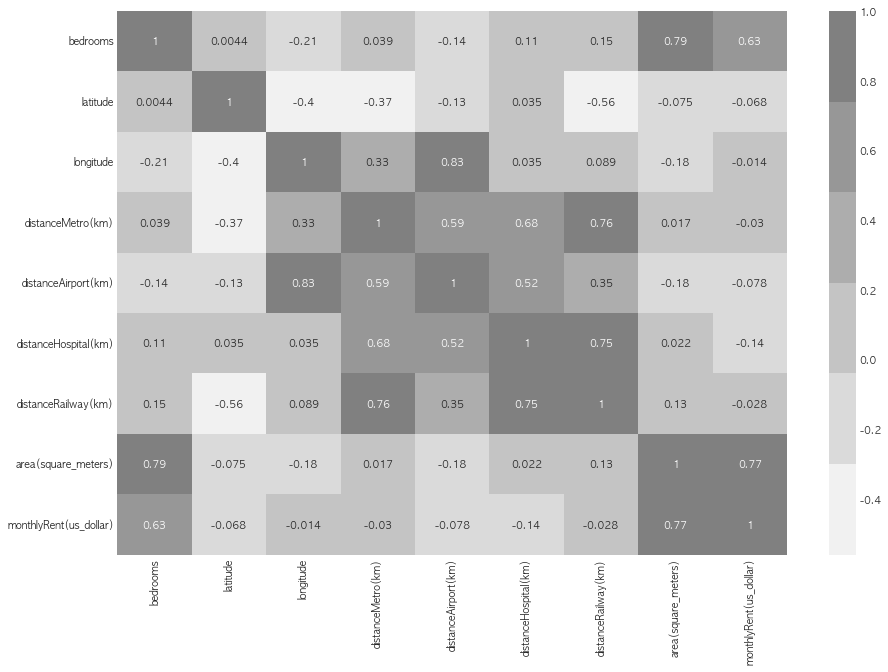

         VIF                features
0   8.588684                bedrooms
1   7.885202     distanceRailway(km)
2   4.502162     distanceAirport(km)
3  10.116868    distanceHospital(km)
4   5.547335  monthlyRent(us_dollar)


In [16]:
# 다중공선성과 상관관계 살펴보기
# 상관관계
train.corr()
plt.figure(figsize = (15,10))
corr_map = sns.light_palette("gray")  
sns.heatmap(train.corr(), annot = True, cmap = corr_map)

plt.show()
 
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
a = train[['bedrooms','distanceRailway(km)' ,'distanceAirport(km)','distanceHospital(km)'
     , 'monthlyRent(us_dollar)']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(a.values, i)  
                    for i in range(a.shape[1])] 
vif['features'] = a.columns

print(vif)

In [17]:
# VIF가 높은 변수들을 제거
# ID와 target 변수도 제거
# 'longitude','distanceMetro(km),'latitude'
train_drop = train.drop(columns = ['ID','monthlyRent(us_dollar)','longitude','latitude','distanceMetro(km)'])
test_drop = test.drop(columns = ['ID', 'longitude', 'latitude','distanceMetro(km)'])

# one-hot encoding

In [18]:
# one - hot encoding
train_drop_dum = pd.get_dummies(train_drop)
test_drop_dum = pd.get_dummies(test_drop)

In [19]:
# 데이터 나누고 학습시키기
from sklearn.model_selection import train_test_split

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(train_drop_dum, y, \
                                                   test_size = 0.2)

# XGBRegressor GridsearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[3,4,5], #when use hyperthread, xgboost may become slower
              'learning_rate': [.03, .07, .05], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7, 0.8],
              'gamma' : [5,10,15],
              'n_estimators': [500, 1000, 1500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_TRAIN,
         Y_TRAIN)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


model = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 6, 
                     min_child_weight = 4, n_estimators = 1000, subsample = 0.7
                     , gamma = 10

In [20]:
# modeling
from xgboost import XGBRegressor
model = XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.03, max_depth = 8, 
                     min_child_weight = 10, n_estimators = 1000, subsample = 0.7
                     , gamma = 0, nthread = 4
                    )

model.fit(X_TRAIN, Y_TRAIN)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4, nthread=4,
             num_parallel_tree=1, predictor='auto', ...)

In [21]:
y_test_predicted = model.predict(test_drop_dum)

In [22]:
submit = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 Basic 해외 부동산 월세 예측 AI 경진대회/open/sample_submission.csv')

In [23]:
submit['monthlyRent(us_dollar)'] = (y_test_predicted)
submit.head()

,ID,monthlyRent(us_dollar)
0,Test_0000,176.155380
1,Test_0001,268.648590
2,Test_0002,315.594543
3,Test_0003,187.799423
4,Test_0004,87.399200


In [24]:
submit.to_csv('./submit7.csv', index=False)

In [25]:
Y_TEST_predicted = model.predict(X_TEST)

In [26]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Y_TEST, Y_TEST_predicted) 
np.sqrt(MSE)

93.83016930765591

In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_TEST, Y_TEST_predicted)
print(r2)

0.8399758122702067


# 결과
## 57.866점을 획득, 42등
## 첫 데이콘 분석 결과치곤 좋은 경험이었다고 생각
## XGBOOST에 대해서 더 공부해보고 싶다는 생각이 들었음.